In [249]:
# 필요한 모듈 import

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import tqdm

import urllib.request
from konlpy.tag import Okt
from gensim.models.word2vec import Word2Vec
import pandas as pd
import matplotlib.pyplot as plt
from konlpy.tag import Twitter

from sklearn.cluster import KMeans
from ast import literal_eval
import numpy as np
from PIL import Image
%matplotlib inline 

In [250]:
ssodam = pd.read_csv('서담_업데이트.txt', sep = '|', index_col = 0)
ssodam = ssodam.astype( {'comment_num' : int, 'like': int, 'view' : int, 'dislike' : int })
ssodam

,title,header,comment_num,writer,like,upload_date,view,link,borad,text,dislike,comment,date_time,hour,word_token
0,도대체가 학교의 기준이 무엇인지 이해가 안됩니다,NaN,14,익명,32,46분 전,429,http://www.ssodam.com//content/980179?prev=1&p...,CPA,교육부 방역수칙이 도대체 어떤 점에서 어떻게 미달이 되는데요? 이걸 알려주셔야죠미달...,0,[['근데 아직 확정?은 아니지 않나요 아직까지는 그냥 누군가가 그렇다더라니까 기다...,2020-08-13 19:01:00,19.0,"[('도대체', 'Noun'), ('가', 'Josa'), ('학교', 'Noun'..."
1,학교 시설물 관련 부서 전화번호 적을테니 내일부터 전화 한통씩하자,NaN,10,익명,38,48분 전,577,http://www.ssodam.com//content/980177?prev=1&p...,익게2,코로나 이후로 전화 자주하는편인데 나도 처음에 어디로 전화해야할지도 막막하고 그래서...,3,[['저런 곳보다 대책회의쪽이 더 확실할텐데 총학도 회의에 몇번 참관한걸로 아는데 ...,2020-08-13 18:59:00,18.0,"[('학교', 'Noun'), ('시설', 'Noun'), ('물', 'Noun')..."
2,걍 서강사이버대학으로 하자,NaN,10,익명,42,55분 전,564,http://www.ssodam.com//content/980173?prev=1&p...,익게2,학교 부지는 외부인 등산하게 냅두고운동장 농구장은 외부인들한테 24시간 무료개방하고...,7,"[['그만•••'], ['뭘 그만하라는거야?'], ['이런 댓글이야 말로 그만......",2020-08-13 18:52:00,18.0,"[('걍', 'Adverb'), ('서강', 'Noun'), ('사이버', 'Nou..."
3,학교 너무 빡친다,쉐복,54,익명,106,18:24,1830,http://www.ssodam.com//content/980162?prev=1&p...,익게2,다른 학교는 감염 위험이 없어서 시설 개방하는 줄 아냐? 아니 등록금은 다 쳐받아놓...,13,"[['교육부 지침에 안맞으면 못여는건가?'], ['어떻게 다른대학들은 5~6월에 고...",2020-08-13 18:24:00,18.0,"[('학교', 'Noun'), ('너무', 'Adverb'), ('빡친다', 'Ad..."
4,박미선 누님 결혼식날 비 오셨죠?,NaN,2,익명,40,17:44,824,http://www.ssodam.com//content/980129?prev=1&p...,익게2,마지막 ㅋ 하나 붙인게 킬포ㅋㅋㅋ,1,"[['난 오셨다길래 정지훈 얘기하는 줄'], ['??? : 모르는데 어떻게가요'],...",2020-08-13 17:44:00,17.0,"[('박미선', 'Noun'), ('누님', 'Noun'), ('결혼식', 'Nou..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8214,새해맞이 연게 첫글,NaN,5,익명,35,01/01,785,http://www.ssodam.com//content/813081?prev=245...,연애상담소,다들 올해는 인생의 단짝을 만나용,0,[['네에 ㅠㅠ 올해는 정말 행복하고 싶어요.. 님두 좋은 인연 만나서 행복하세요 ...,2020-01-01 00:24:00,0.0,"[('새해', 'Noun'), ('맞이', 'Noun'), ('연', 'Noun')..."
8215,올해는 행시합격한다,NaN,5,익명,86,01/01,1180,http://www.ssodam.com//content/813062?prev=245...,익게2,토모관 여러분도\n\n\n \n\n \n ...,0,"[['나도 행시 올 해 붙는다!'], ['나도 올해 붙는다!'], ['민특상디 사례...",2020-01-01 00:08:00,0.0,"[('올해', 'Noun'), ('는', 'Josa'), ('행시', 'Noun')..."
8216,??? : 야 올해가 몇년이냐?,NaN,9,익명,127,01/01,1982,http://www.ssodam.com//content/813058?prev=245...,익게2,다들 새해복!,0,"[['좌우로 정렬해주세여'], ['ㅁㅊ ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 적절한 짤 추'], ['...",2020-01-01 00:06:00,0.0,"[('???', 'Punctuation'), (':', 'Punctuation'),..."
8217,2020년 서강의 첫 모습,NaN,5,익명,101,01/01,1931,http://www.ssodam.com//content/813047?prev=245...,익게2,방금 토모관에서 나와서 찍어봤어20대의 절반을 서강과 함께할수 있어서 진심으로 행복...,0,"[['나도 방금 나왔는데 ㅎㅎㅎ 다미 본듯'], ['내년에는 좋은 소식만 들리자!!...",2020-01-01 00:04:00,0.0,"[('2020년', 'Number'), ('서강', 'Noun'), ('의', 'J..."


In [251]:
tmpp = pd.DataFrame()
tmpp['tmp'] = ssodam['text']
tmpp = tmpp.fillna('NaN')
ssodam['text'] = tmpp['tmp']

for i in ssodam.index:
    if ssodam['text'][i] == 'NaN':
        ssodam['text'][i] = ssodam['title'][i]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [252]:
ssodam['text'] = ssodam['text'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣, \d, % ]","")
ssodam

,title,header,comment_num,writer,like,upload_date,view,link,borad,text,dislike,comment,date_time,hour,word_token
0,도대체가 학교의 기준이 무엇인지 이해가 안됩니다,NaN,14,익명,32,46분 전,429,http://www.ssodam.com//content/980179?prev=1&p...,CPA,교육부 방역수칙이 도대체 어떤 점에서 어떻게 미달이 되는데요 이걸 알려주셔야죠미달이...,0,[['근데 아직 확정?은 아니지 않나요 아직까지는 그냥 누군가가 그렇다더라니까 기다...,2020-08-13 19:01:00,19.0,"[('도대체', 'Noun'), ('가', 'Josa'), ('학교', 'Noun'..."
1,학교 시설물 관련 부서 전화번호 적을테니 내일부터 전화 한통씩하자,NaN,10,익명,38,48분 전,577,http://www.ssodam.com//content/980177?prev=1&p...,익게2,코로나 이후로 전화 자주하는편인데 나도 처음에 어디로 전화해야할지도 막막하고 그래서...,3,[['저런 곳보다 대책회의쪽이 더 확실할텐데 총학도 회의에 몇번 참관한걸로 아는데 ...,2020-08-13 18:59:00,18.0,"[('학교', 'Noun'), ('시설', 'Noun'), ('물', 'Noun')..."
2,걍 서강사이버대학으로 하자,NaN,10,익명,42,55분 전,564,http://www.ssodam.com//content/980173?prev=1&p...,익게2,학교 부지는 외부인 등산하게 냅두고운동장 농구장은 외부인들한테 24시간 무료개방하고...,7,"[['그만•••'], ['뭘 그만하라는거야?'], ['이런 댓글이야 말로 그만......",2020-08-13 18:52:00,18.0,"[('걍', 'Adverb'), ('서강', 'Noun'), ('사이버', 'Nou..."
3,학교 너무 빡친다,쉐복,54,익명,106,18:24,1830,http://www.ssodam.com//content/980162?prev=1&p...,익게2,다른 학교는 감염 위험이 없어서 시설 개방하는 줄 아냐 아니 등록금은 다 쳐받아놓고...,13,"[['교육부 지침에 안맞으면 못여는건가?'], ['어떻게 다른대학들은 5~6월에 고...",2020-08-13 18:24:00,18.0,"[('학교', 'Noun'), ('너무', 'Adverb'), ('빡친다', 'Ad..."
4,박미선 누님 결혼식날 비 오셨죠?,NaN,2,익명,40,17:44,824,http://www.ssodam.com//content/980129?prev=1&p...,익게2,마지막 ㅋ 하나 붙인게 킬포ㅋㅋㅋ,1,"[['난 오셨다길래 정지훈 얘기하는 줄'], ['??? : 모르는데 어떻게가요'],...",2020-08-13 17:44:00,17.0,"[('박미선', 'Noun'), ('누님', 'Noun'), ('결혼식', 'Nou..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8214,새해맞이 연게 첫글,NaN,5,익명,35,01/01,785,http://www.ssodam.com//content/813081?prev=245...,연애상담소,다들 올해는 인생의 단짝을 만나용,0,[['네에 ㅠㅠ 올해는 정말 행복하고 싶어요.. 님두 좋은 인연 만나서 행복하세요 ...,2020-01-01 00:24:00,0.0,"[('새해', 'Noun'), ('맞이', 'Noun'), ('연', 'Noun')..."
8215,올해는 행시합격한다,NaN,5,익명,86,01/01,1180,http://www.ssodam.com//content/813062?prev=245...,익게2,토모관 여러분도 토모관 밖 ...,0,"[['나도 행시 올 해 붙는다!'], ['나도 올해 붙는다!'], ['민특상디 사례...",2020-01-01 00:08:00,0.0,"[('올해', 'Noun'), ('는', 'Josa'), ('행시', 'Noun')..."
8216,??? : 야 올해가 몇년이냐?,NaN,9,익명,127,01/01,1982,http://www.ssodam.com//content/813058?prev=245...,익게2,다들 새해복,0,"[['좌우로 정렬해주세여'], ['ㅁㅊ ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 적절한 짤 추'], ['...",2020-01-01 00:06:00,0.0,"[('???', 'Punctuation'), (':', 'Punctuation'),..."
8217,2020년 서강의 첫 모습,NaN,5,익명,101,01/01,1931,http://www.ssodam.com//content/813047?prev=245...,익게2,방금 토모관에서 나와서 찍어봤어20대의 절반을 서강과 함께할수 있어서 진심으로 행복...,0,"[['나도 방금 나왔는데 ㅎㅎㅎ 다미 본듯'], ['내년에는 좋은 소식만 들리자!!...",2020-01-01 00:04:00,0.0,"[('2020년', 'Number'), ('서강', 'Noun'), ('의', 'J..."


In [253]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','하다','ㅋ']

In [6]:
# konlpy의 twitter 모듈 사용

okt = Okt()
t = Twitter()
tokenized_data = []
for sentence in tqdm.tqdm_notebook(ssodam['text']):
    temp_X = t.nouns(sentence) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_X)

C:\ProgramData\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


In [7]:
# 워드투벡터

w2v_model = Word2Vec(sentences = tokenized_data, min_count = 30, size = 100, window = 5, sg = 1, workers = 4)
w2v_model.save("w1.model")

In [8]:
w2v_model.most_similar('코로나')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('사태', 0.8399101495742798),
 ('신종', 0.774043619632721),
 ('확산', 0.7352579832077026),
 ('시국', 0.7310693264007568),
 ('폐렴', 0.7290308475494385),
 ('바이러스', 0.7227926254272461),
 ('유럽', 0.7172774076461792),
 ('초기', 0.710247278213501),
 ('졸업식', 0.7044838070869446),
 ('취소', 0.701439619064331)]

In [9]:
word_vectors = w2v_model.wv.syn0
w2v_model.wv.syn0.shape

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  


(1882, 100)

In [255]:
# K-means 시각화 파트

num_clusters = 20 #cluster의 갯수 산정
kmeans_clustering = KMeans( n_clusters = num_clusters, random_state = 2020, max_iter = 500)

In [256]:
idx = kmeans_clustering.fit_predict(word_vectors)

In [257]:
idx = list(idx)
names = w2v_model.wv.index2word 
word_centroid_map = {names[i]: idx[i] for i in range(len(names))}

In [258]:
for cluster in range(0,num_clusters):
    # 클러스터 번호를 출력
    print("\nCluster {}".format(cluster))
    
    # 클러스터번호와 클러스터에 있는 단어를 찍는다.
    words = []
    for i in range(0,len(list(word_centroid_map.values()))): #list(dict)키 값만 리스트로 반환
        if len(list(word_centroid_map.keys())[i]) == 1:
            continue
        #list(dict.values)는 value값이 리스트로 반환
        if( list(word_centroid_map.values())[i] == cluster ):
            words.append(list(word_centroid_map.keys())[i])
    print(words)


Cluster 0
['오늘', '다시', '연락', '갑자기', '혼자', '하루', '카톡', '동생', '전화', '매일', '알바', '어제', '선생님', '아침', '저녁', '새벽', '주말', '언니', '번호', '방금', '일주일', '내일', '문자', '자취', '약속', '자고', '종일', '잠깐', '생일', '출근', '며칠', '저번', '데이트', '겨우', '답장', '점심', '퇴근', '그날', '일찍', '핸드폰', '독서실', '이틀', '몰래', '도착', '안보', '차단', '통화', '용돈', '편지', '이불', '고시생', '일어나서', '생리']

Cluster 1
['진짜', '그냥', '지금', '하나', '보고', '사실', '계속', '이제', '여기', '요즘', '일단', '해도', '어디', '무슨', '원래', '입장', '거기', '이건', '제대로', '그게', '달라', '이름', '누구', '그거', '누가', '등등', '아무', '심지어', '아예', '예전', '잘못', '자꾸', '언제', '수가', '가면', '반응', '제발', '완전', '대체', '인간', '굳이', '고생', '점점', '중이', '하자', '저런', '위로', '충격', '당장', '사과', '애초', '끼리', '는걸', '자랑', '거지', '보이', '영화', '막상', '옛날', '화가', '무시', '사정', '기적', '벌써', '가야', '어쨌든', '목소리', '안해', '시국', '자연', '거임', '회장', '난리', '자유', '요새', '레전드', '저기', '마냥', '가도', '칭찬', '오지', '몇몇', '거래', '어이', '오해', '가요', '자살', '싸움', '보임', '게다가', '쓰레기', '된거', '드립', '사기', '대하', '도대체', '발언', '본적', '감독', '바보', '가까이', '반박', '동물', '고함', '온갖', '정작', '듣기'

['코로나', '병원', '중국', '마스크', '진자', '감염', '검사', '지난', '발생', '지역', '일본', '바이러스', '조사', '치료', '환자', '의료', '국내', '경찰', '방역', '교회', '중국인', '증상', '격리', '우한', '전국', '진료', '대구', '확진', '접촉', '클럽', '이동', '신종', '자가', '주민', '수입', '폐렴', '입원', '입국', '주얼', '확산', '사망', '동선', '증가', '코로나바이러스', '판정', '음성', '이태원', '사망자', '왕준', '도시', '정관용']


- 0 : 교내이슈 + 19
- 1 : 코로나
- 2 : ?
- 3 : 맛게
- 4 : 대학평가
- 5 : 가족
- 6 : ?
- 7 : 연애
- 8 :법
- 9 : 인간관계
- 10 : 고시
- 11 : 마음가짐(애매)
- 12 : 취업준비(스펙)
- 13 : 자격증(애매)
- 14 : 학교시설
- 15 : 애매
- 16 : 커뮤니티
- 17 : 정치 / 사회
- 18 : 취업정보
- 19 : 교내이슈

### 군집별 클러스터링

- 2 : 불만 / 요구사항
- 10 + 17 :교내이슈
- 3 : 고시
- 5 + 12 : 인간관계
- 6 + 9 + 16 : 취업
- 7 : 커뮤니티
- 8 : 맛게
- 11 : 대학평가
- 13 : 가치관
- 15 : 정치 / 사회
- 19 : 코로나
- 0 1 4 14 18 : 애매

In [354]:
# tsne 알고리즘

from sklearn.manifold import TSNE

In [355]:
new_word, new_idx, new_names = [], [], []
for i in range(len(idx)):
    if idx[i] == 0 or idx[i] == 1 or idx[i] == 4 or idx[i] == 14 or idx[i] == 18:
        continue
    else:
        new_names.append(names[i])
        new_word.append(word_vectors[i])
        new_idx.append(idx[i])
new_word = np.array(new_word)

In [262]:
tsne = TSNE(random_state = 0)

# word_vectors_tsne = tsne.fit_transform(new_word)
word_vectors_tsne = tsne.fit_transform(new_word)

In [356]:
# 클러스터 매핑

cluster_dict = {'2':'불만/요구사항','10':'교내이슈','17':'교내이슈','3':'고시','5':'인간관계','12':'인간관계', '6':'취업','9':'취업',
                '16':'취업', '7':'커뮤니티', '8':'맛게', '11':'대학평가','13':'가치관','15':'정치/사회','19':'정치/사회'}
cluster_map = {'2':9, '10':0, '17':0, '3': 1, '5':2, '12':2, '6':3, '9':3, '16':3, '7':4, '8':5, '11':6, '13':7, '15':8, '19':8}
temp = pd.DataFrame({'index': new_idx}).astype('str')
temp['cluster'] = temp['index'].replace(cluster_map)
temp['clustering'] = temp['index'].astype('str').replace(cluster_dict)
temp

,index,cluster,clustering
0,13,7,가치관
1,5,2,인간관계
2,13,7,가치관
3,5,2,인간관계
4,13,7,가치관
...,...,...,...
1316,5,2,인간관계
1317,2,9,불만/요구사항
1318,2,9,불만/요구사항
1319,6,3,취업


In [357]:
temp[['cluster','clustering']].drop_duplicates()

,cluster,clustering
0,7,가치관
1,2,인간관계
6,0,교내이슈
7,4,커뮤니티
8,1,고시
12,6,대학평가
13,3,취업
21,8,정치/사회
39,5,맛게
47,9,불만/요구사항


In [358]:
len(set(temp['cluster'])), len(set(temp['clustering']))

(10, 10)

In [360]:
cluster_index = temp.cluster

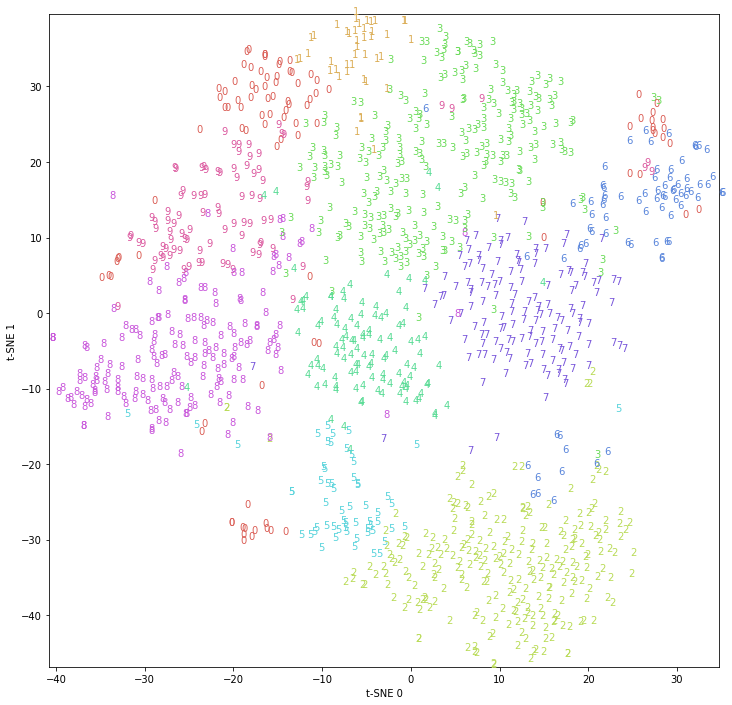

In [361]:
# 군집별 시각화

plt.figure(figsize=(12,12))

colors = sns.color_palette(palette = 'hls', n_colors = 10)

for i in range(len(word_vectors_tsne)):
    plt.text(word_vectors_tsne[i][0], word_vectors_tsne[i][1], str(cluster_index[i]), color = colors[cluster_index[i]])

plt.xlim(word_vectors_tsne[:, 0].min(), word_vectors_tsne[:, 0].max())
plt.ylim(word_vectors_tsne[:, 1].min(), word_vectors_tsne[:, 1].max())

plt.xlabel('t-SNE 0')
plt.ylabel('t-SNE 1')

plt.savefig('시각화.png')

plt.show()